# Klasyfikacja
## Wprowadzenie

Klasyfikacja polega na przypisaniu każdej obserwacji do jednej z dwóch lub więcej klas.

**Przykłady**:
- filtr antyspamowy
- decyzja o przyznaniu kredytu
- rozpoznawanie obiektu na obrazku

In [1]:
import pandas as pd

df = pd.read_csv("data/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,173.474833,82.811309
1,Female,161.458254,73.508428
2,Male,172.518192,80.403320
3,Male,179.483147,98.592825
4,Female,150.389045,62.627929


## Regresja logistyczna
### Opis modelu

Regresja logistyczna polega na stworzeniu liniowego modelu separującego klasy na podstawie cech obserwacji. Zazwyczaj używa się jej do klasyfikacji binarnej, choć może zostać wykorzystana również do wieloklasowej.

In [2]:
df.insert(0, "IsMale", df["Gender"].map(lambda x: x == "Male").astype(int))
df.drop("Gender", axis=1, inplace=True)

df.head()

,IsMale,Height,Weight
0,1,173.474833,82.811309
1,0,161.458254,73.508428
2,1,172.518192,80.403320
3,1,179.483147,98.592825
4,0,150.389045,62.627929


**Model matematyczny**

*dla jednej zmiennej objaśniającej*

$f(x) = \dfrac{1}{1+\text{e}^{-(a\cdot x + b)}}$

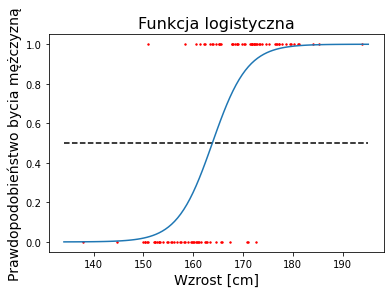

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt

def logistic_function(x):
    return 1 / (1 + np.exp(-(-46.54088409 + 0.2840913 * x)))

x = np.linspace(min(df["Height"]), max(df["Height"]), 100)
y = logistic_function(x)

plt.xlabel("Wzrost [cm]", fontsize=14)
plt.ylabel("Prawdopodobieństwo bycia mężczyzną", fontsize=14)
plt.title("Funkcja logistyczna", fontsize=16)

plt.plot([min(df["Height"]), max(df["Height"])], [0.5, 0.5], 'k--')
plt.scatter(df["Height"].iloc[:100], df["IsMale"].iloc[:100], c='r', s=2)

plt.plot(x, y);  # zastosowanie średnika nie wymaga użycia 'plt.show()'

<IPython.core.display.Javascript object>


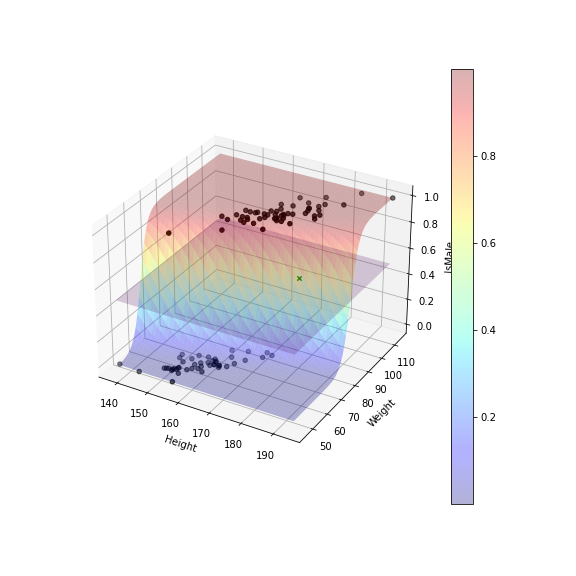

In [36]:
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

def logistic_function(x1, x2):
    return 1 / (1 + np.exp(-(-1.11459145 - 0.16430548 * x1 + 0.39017451 * x2)))

X = np.linspace(min(df["Height"].iloc[:100]), max(df["Height"].iloc[:100]), 100)
Y = np.linspace(min(df["Weight"].iloc[:100]), max(df["Weight"].iloc[:100]), 100)
X, Y = np.meshgrid(X, Y)
Z = logistic_function(X, Y)

ax.set_xlabel("Height")
ax.set_ylabel("Weight")
ax.set_zlabel("IsMale")

cb = surf = ax.plot_surface(X, Y, Z, cmap='jet', alpha=.3)
surf1 = ax.plot_surface(X, Y, np.full(X.shape, 0.5), cmap='viridis', alpha=.2)

x = df["Height"].iloc[:100]  # np.random.uniform(140, 180, size=16)
y = df["Weight"].iloc[:100]  # np.random.uniform(60, 100, size=16)
z = df["IsMale"].iloc[:100]
ax.scatter(x, y, z, c='k');

ax.scatter([180], [80], [logistic_function(180, 80)], marker='x', c='green')
fig.colorbar(cb)
plt.show()

### Trenowanie modelu

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

In [6]:
X = df[["Height", "Weight"]]
y = df["IsMale"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)  # balans klas !

In [7]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
model.coef_, model.intercept_

(array([[-0.21308177,  0.44433302]]), array([2.66285807]))

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)  # kolejność: (wartość prawdziwa, wartość przewidywana)

0.9206060606060606

**ZALETY:**
- Model regresji liniowej jest w pewnym stopniu interpretowalny
- Nie wymaga dużych ilości danych ani obliczeń

**WADY:**
- Nie jest w stanie uchwycić złożonych zależności
- Podatny na outliery

**ZASTOSOWANIA:**
- Proste, liniowe problemy

**DODATKOWE MATERIAŁY:**
- https://towardsdatascience.com/logistic-regression-explained-and-implemented-in-python-880955306060
- https://www.mastersindatascience.org/learning/machine-learning-algorithms/logistic-regression/
- https://www.youtube.com/watch?v=yIYKR4sgzI8

> ZADANIA

## Ewaluacja klasyfikacji

Istnieją różne metryki sukcesu dla klasyfikacji binarnej. Podstawą do ich zrozumienia jest tzw. macierz pomyłek (*confusion matrix*).

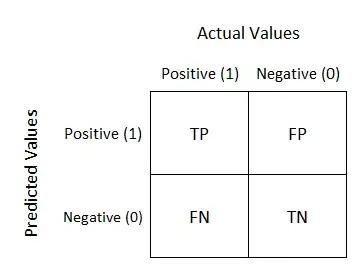

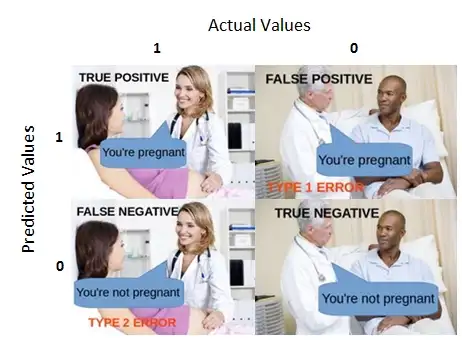

Źródło: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

Najważniejsze metryki dla klasyfikacji binarnej to:


***Accuracy***

Najprostsza ze wszystkich metryk. Wyznaczamy ją dzieląc poprawnie zaklasyfikowane obserwacje przez wszystkie jakie podlegały klasyfikacji.

$\text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN}$

---

***Precision***

Precyzja określa jaka część wszystkich pozytywnych wyników była rzeczywiście prawdziwa.

$\text{precision} = \dfrac{TP}{TP + FP}$

---

***Recall***

Inaczej nazywana *sensitivity*. Określa jaki procent wszystkich prawdziwych obserwacji udało nam się znaleźć.

$\text{recall} = \dfrac{TP}{TP + FN}$

---

***F1 Score***

Jeżeli chcemy mieć zarówno wysoką precyzję jak i czułość możemy do optymalizacji algorytmu użyć ich średniej harmonicznej czyli *F1 score*.

$\text{F1} = \dfrac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$

In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
precision_score(y_test, y_pred)

0.9190821256038647

In [12]:
recall_score(y_test, y_pred)

0.9224242424242424

In [13]:
f1_score(y_test, y_pred)

0.9207501512401695

In [14]:
confusion_matrix(y_test, y_pred)

array([[1516,  134],
       [ 128, 1522]])

In [15]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.92214   0.91879   0.92046      1650
           1    0.91908   0.92242   0.92075      1650

    accuracy                        0.92061      3300
   macro avg    0.92061   0.92061   0.92061      3300
weighted avg    0.92061   0.92061   0.92061      3300



> ZADANIA

## Drzewo decyzyjne (*decision tree*)
### Idea drzewa decyzyjnego

Pytanie: Czy iść w góry?

Odpowiedź:
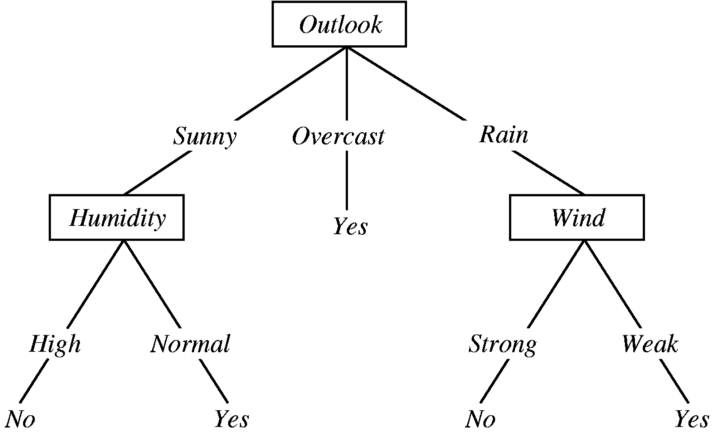

Źródło: https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96

### Trenowanie modelu

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.873030303030303

In [18]:
model.get_depth()

28

In [19]:
model.get_n_leaves()

727

In [20]:
model = DecisionTreeClassifier(max_depth=3, criterion='gini')  # inne kryterium decyzyjne ('gini', 'entropy', 'log_loss')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_pred, y_test)

0.9193939393939394

### Wizualizacja oraz interpretacja modelu

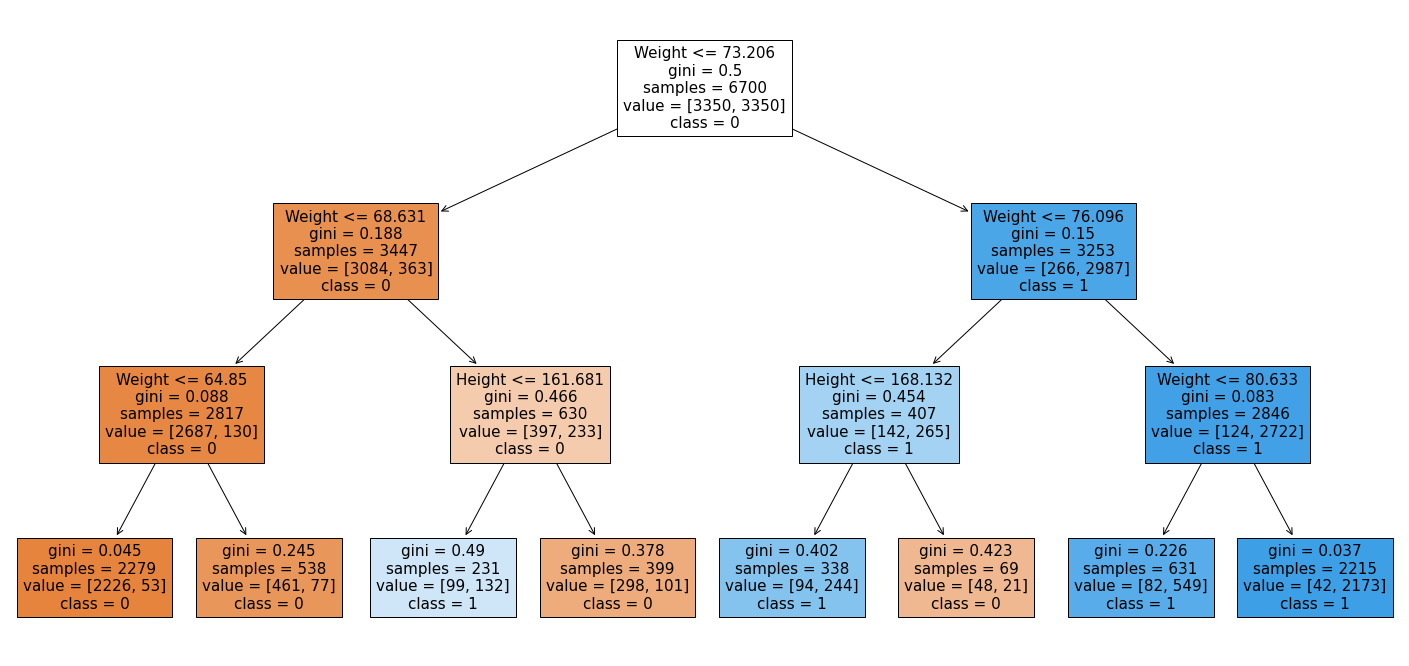

In [21]:
%matplotlib inline
fig = plt.figure(figsize=(25, 12))
plot_tree(model, feature_names=model.feature_names_in_, class_names=model.classes_.astype('str'), filled=True);

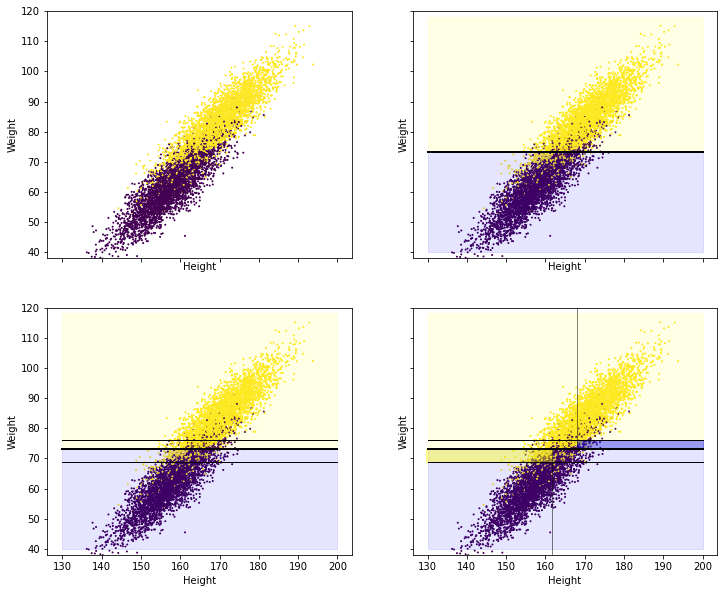

In [22]:
%matplotlib inline
from matplotlib import patches

def _plot_decision():
    fig, ax = plt.subplots(figsize=(12, 10), ncols=2, nrows=2, sharex=True, sharey=True)

    ax[0, 0].scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=1)
    ax[0, 0].set_xlabel("Height")
    ax[0, 0].set_ylabel("Weight")

    ax[0, 0].set_ylim(38, 120)
    # ====
    ax[0, 1].scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=1)
    ax[0, 1].set_xlabel("Height")
    ax[0, 1].set_ylabel("Weight")

    # first level
    ax[0, 1].plot([130, 200], [73.206, 73.206], 'k', linewidth=2)

    # color spans
    rectangle = patches.Rectangle((130, 40), 70, 33.206, color='blue', alpha=.1)
    ax[0, 1].add_patch(rectangle)

    rectangle = patches.Rectangle((130, 73.206), 70, 45, color='yellow', alpha=.1)
    ax[0, 1].add_patch(rectangle)


    ax[0, 1].set_ylim(38, 120)
    # ===
    ax[1, 0].scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=1)
    ax[1, 0].set_xlabel("Height")
    ax[1, 0].set_ylabel("Weight")

    # first level
    ax[1, 0].plot([130, 200], [73.206, 73.206], 'k', linewidth=2)

    # second level
    ax[1, 0].plot([130, 200], [68.631, 68.631], 'k', linewidth=1)
    ax[1, 0].plot([130, 200], [76.096, 76.096], 'k', linewidth=1)

    # color spans
    rectangle = patches.Rectangle((130, 40), 70, 33.206, color='blue', alpha=.1)
    ax[1, 0].add_patch(rectangle)

    rectangle = patches.Rectangle((130, 73.206), 70, 45, color='yellow', alpha=.1)
    ax[1, 0].add_patch(rectangle)

    ax[1, 0].set_ylim(38, 120)
    # ===

    ax[1, 1].scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=1)
    ax[1, 1].set_xlabel("Height")
    ax[1, 1].set_ylabel("Weight")

    # first level
    ax[1, 1].plot([130, 200], [73.206, 73.206], 'k', linewidth=2)

    # second level
    ax[1, 1].plot([130, 200], [68.631, 68.631], 'k', linewidth=1)
    ax[1, 1].plot([130, 200], [76.096, 76.096], 'k', linewidth=1)

    # third level level
    ax[1, 1].plot([161.681, 161.681], [35, 73.206], 'k', linewidth=.5)

    ax[1, 1].plot([168.132, 168.132], [73.206, 125], 'k', linewidth=.5)

    # color spans
    rectangle = patches.Rectangle((130, 40), 70, 33.206, color='blue', alpha=.1)
    ax[1, 1].add_patch(rectangle)

    rectangle = patches.Rectangle((130, 73.206), 70, 45, color='yellow', alpha=.1)
    ax[1, 1].add_patch(rectangle)

    rectangle = patches.Rectangle((161.681, 68.631), -32, 4.575, color='yellow', alpha=.4)
    ax[1, 1].add_patch(rectangle)

    rectangle = patches.Rectangle((168.132, 73.206), 32, 2.9, color='blue', alpha=.4)
    ax[1, 1].add_patch(rectangle)


    ax[1, 1].set_ylim(38, 120)
    
_plot_decision()

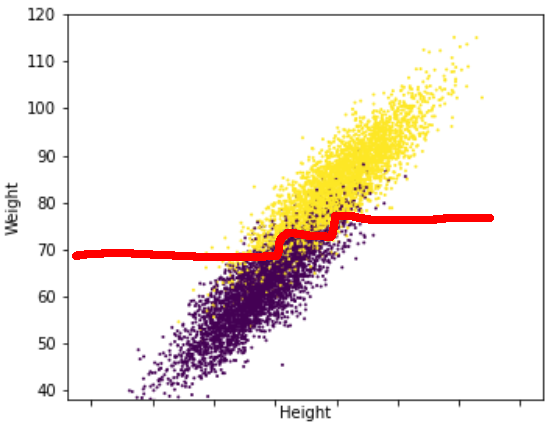

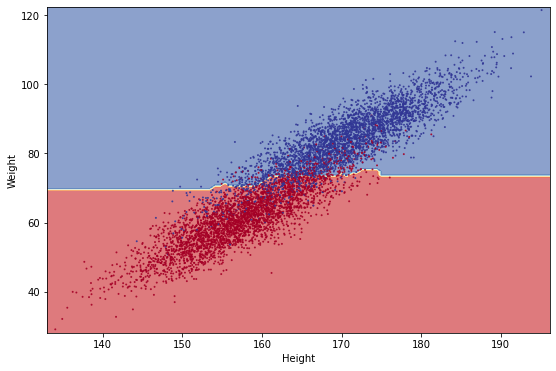

In [115]:
%matplotlib inline

from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision(model):
    fig, ax = plt.subplots(figsize=(9, 6))
    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        alpha=.6
    )

    ax.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=1, alpha=.8, cmap=plt.cm.RdYlBu);
    
plot_decision(model)

In [24]:
model.feature_names_in_

array(['Height', 'Weight'], dtype=object)

In [25]:
model.feature_importances_

array([0.02016876, 0.97983124])

In [26]:
model.get_depth()

3

In [27]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1])

In [29]:
model.predict_proba(X_test)  # ciekawa wartość ostatniej obserwacji ...

array([[0.01896163, 0.98103837],
       [0.97674419, 0.02325581],
       [0.97674419, 0.02325581],
       ...,
       [0.01896163, 0.98103837],
       [0.97674419, 0.02325581],
       [0.27810651, 0.72189349]])

---

**Interpretacja dla pojedynczej obserwacji**

In [30]:
test_height, test_weight = 162, 70

decision_path = model.decision_path([[test_height, test_weight]])

/home/mdabrowski-phd/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [31]:
# !pip install pydotplus
# !pip install graphviz

In [32]:
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=model.feature_names_in_,
                                class_names=model.classes_.astype(str),
                                filled=True, rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

for n, node_value in enumerate(decision_path.toarray()[0]):
    
    if node_value == 0:
        continue
    
    node = graph.get_node(str(n))[0]            
    node.set_fillcolor('#e6ffe6')
    labels = node.get_attributes()['label'].split('<br/>')
    
    for i, label in enumerate(labels):
        if label.startswith('samples = '):
            labels[i] = f"samples = {int(label.split('=')[1]) + 1}"

    node.set('label', '<br/>'.join(labels))

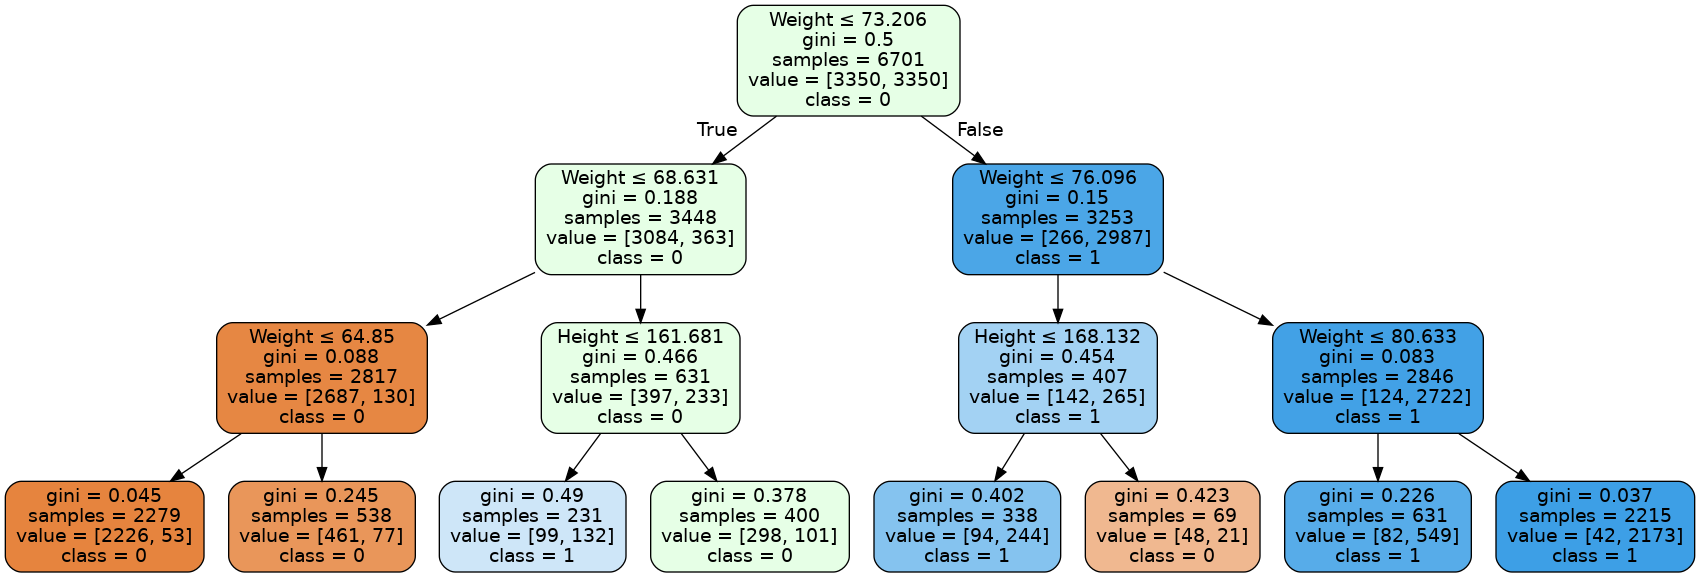

In [33]:
from IPython.display import Image

Image(graph.create_png())

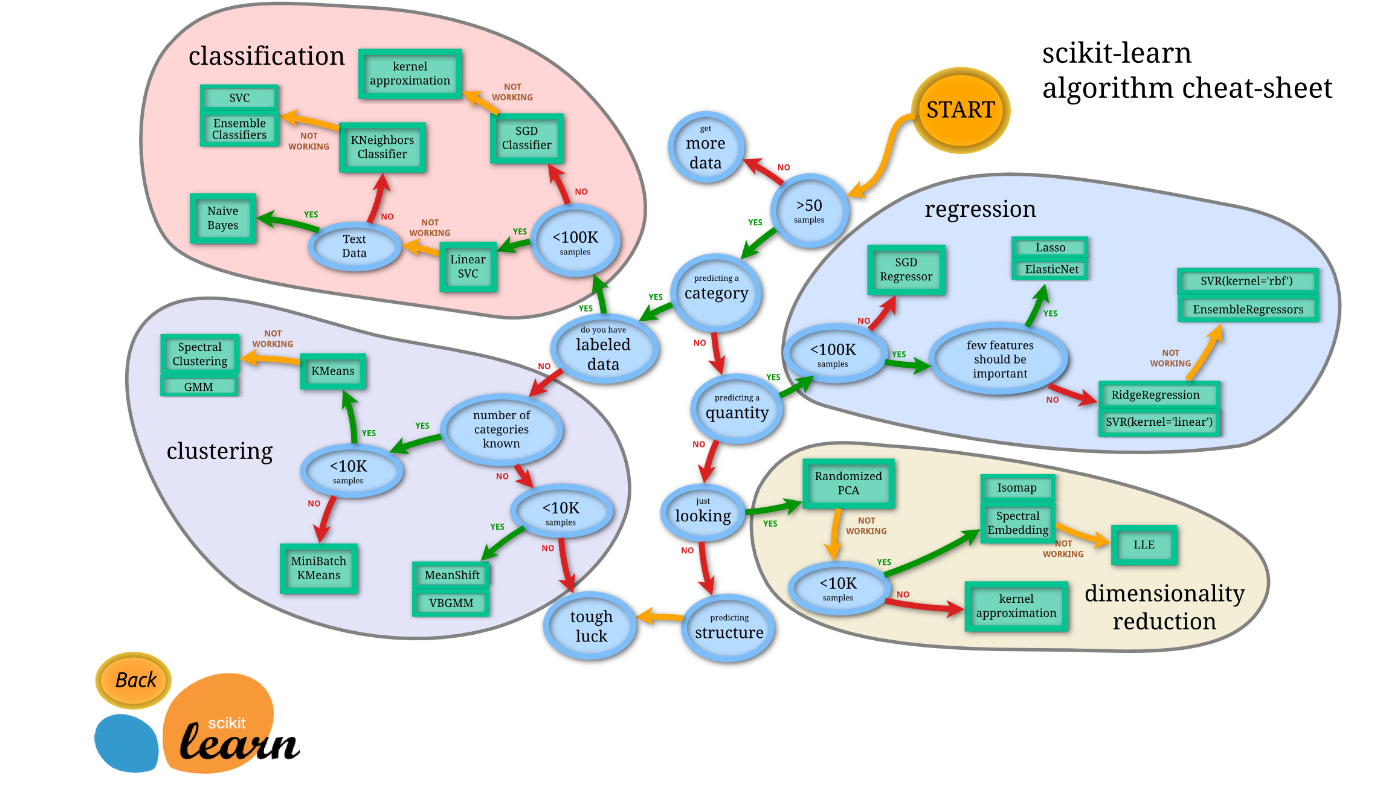

**ZALETY:**
- Model wysoce interpetowalny
- Dobrze radzi sobie z nieliniowością
- Nie wymaga normalizacji danych
- Odporny na outliery

**WADY:**
- Ma tendencję do overfittingu

**ZASTOSOWANIA:**
- Decyzja o udzieleniu kredytu
- Wszędzie tam gdzie należy podjąć interpretowalną decyzję

**DODATKOWE MATERIAŁY:**
- https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96
- https://www.youtube.com/watch?v=_L39rN6gz7Y

> ZADANIA

## Naiwny klasyfikator Bayesa (*Naive Bayes Classifier - NBC*)

Klasyfikatory Bayesowskie to grupa algorytmów a nie jeden konkretny.
- **Multinomial** naive Bayes (dla cech dyskretnych, np. liczebność słów)
- **Gaussian** naive Bayes (dla cech ciągłych, najlepiej według rozkładu normalnego)
- **Bernoulli** naive Bayes (dla cech binarnych - tak/nie, prawda/fałsz)

Użyjemy GNB ze względu na to, że nasze cechy są ciągłe. Dla pozostałych klasyfikatorów idea jest analogiczna.

---

*Naiwność* algorytmu bierze się z tego, że zakładamy **niezależność** zmiennych względem siebie. Rzeczywistość jest często inna. W naszym przykładzie wzrost oraz waga nie są od siebie całkowicie niezależne.

---

Określenie *Bayesowski* oznacza, że opiera się o twierdzenie Bayesa dotyczące prawdopodobieństwa warunkowego:
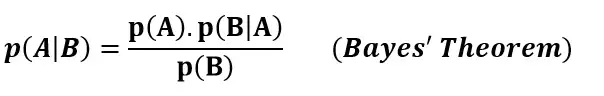

Klasyfikacja Bayesowska polega na określeniu wartości zmiennej zależnej *pod warunkiem* wystąpienia określonych wartości cech. Przykładowo:
> Prawdopodobieństwo, że człowiek będzie kobietą wynosi 50%. Jeśli jednak ten człowiek waży 50kg i ma 170cm wzrostu to prawdopodobieństwo rośnie

---

Dla dwóch cech $X_1$, $X_2$, których wartości wynoszą $x_1$ i $x_2$ prawodopodobieństwo, że target wyniesie 1 to:
$$
p(1|X_1=x_1, X_2=x_2) = \dfrac{p(1) \cdot p(X_1=x_1, X_2=x_2|1)}{p(X_1=x_1, X_2=x_2)}
$$


Zakładając **niezależność cech** (klasyfikator jest *naiwny*) możemy przyjąć że:

$$
p(X_1=x_1, X_2=x_2|1) = p(X_1=x_1|1) \cdot p(X_2=x_2|1)
$$

dzięki czemu jest wymagana tak duża ilość danych do określenia poszczególnych członów - $p(X_1=x_1|1)$ oraz $p(X_2=x_2|1)$ - jaka byłaby potrzebna do policzenia $p(X_1=x_1, X_2=x_2|1)$

---

**Podsumowując**: NBC dokonując predykcji bazuje na prawdopodobieństwie / rozkładzie prawdodpobieństwa oraz twierdzeniu Bayesa.

In [34]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.8966666666666666

**ZALETY:**
- Model jest szybki (nie wymaga wielu obliczeń)
- Nie potrzebujemy bardzo wielu danych do osiągnięcia niezłych wyników - zawdzięczamy to naiwności, czyli założeniu niezależności cech
- Sprawdza się dla danych, w których mamy wiele cech, ponieważ ich duża liczba nie przekłada się na szybki wzrost złożoności obliczeniowej
- Posiada metodę `partial_fit()` do tzw. *online learning* czyli dotrenowywania

**WADY:**
- Jeśli założenie niezależności cech jest fałszywe dostaniemy niedokładne wyniki
- Dla zmiennych ciągłych przyjmowane jest założenie normalności rozkładu

**ZASTOSOWANIA:**
- Predykcja w czasie rzeczywistym - jest szybki i posiada możliwość dotrenowywania
- Klasyfikacja tekstu - dobrze radzi sobie z danymi, w których jest wiele cech
- Systemy rekomendacyjne bazujące na podobieństwie do innych użytkowników

**DODATKOWE MATERIAŁY:**
- https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf
- https://www.youtube.com/watch?v=O2L2Uv9pdDA

> ZADANIA

## Klasyfikator *Support Vector Machine* (SVM, SVC)
### Klasyfikacja liniowa

Klasyczne - liniowe - podejście do klasyfikacji SVM działa podobnie do regresji logistycznej. Polega na znalezieniu takiej hiperpłaszczyzny, która najlepiej rozdziela obie klasy (działa również dla wielu klas)

In [48]:
from sklearn.svm import SVC  # SVR - regresor zamiast klasyfikatora
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

X, y = make_blobs(n_samples=40, centers=2, random_state=6)  # centers=3

In [49]:
y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [50]:
X

array([[  6.37734541, -10.61510727],
       [  6.50072722,  -3.82403586],
       [  4.29225906,  -8.99220442],
       [  7.39169472,  -3.1266933 ],
       [  7.64306311, -10.02356892],
       [  8.68185687,  -4.53683537],
       [  5.37042238,  -2.44715237],
       [  9.24223825,  -3.88003098],
       [  5.73005848,  -4.19481136],
       [  7.9683312 ,  -3.23125265],
       [  7.37578372,  -8.7241701 ],
       [  6.95292352,  -8.22624269],
       [  8.21201164,  -1.54781358],
       [  6.85086785,  -9.92422452],
       [  5.64443032,  -8.21045789],
       [ 10.48848359,  -2.75858164],
       [  7.27059007,  -4.84225716],
       [  6.29784608, -10.53468031],
       [  9.42169269,  -2.6476988 ],
       [  8.98426675,  -4.87449712],
       [  6.6008728 ,  -8.07144707],
       [  5.95313618,  -6.82945967],
       [  6.87151089, -10.18071547],
       [  6.26221548,  -8.43925752],
       [  7.97164446,  -3.38236058],
       [  7.67619643,  -2.82620437],
       [  7.92736799,  -9.7615272 ],
 

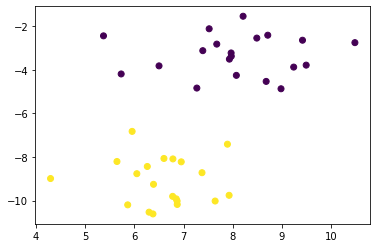

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [52]:
clf = SVC(kernel="linear")  # rbf
clf.fit(X, y);

In [55]:
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [53]:
y_pred = clf.predict(X)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

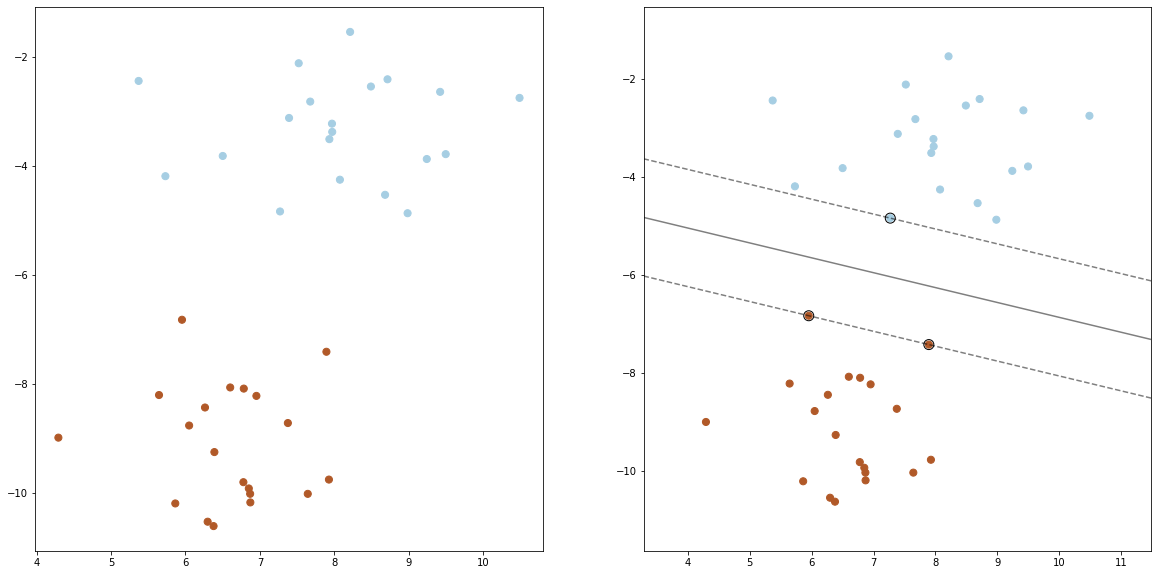

In [54]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10), ncols=2)

# plot points
ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
ax[1].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

<IPython.core.display.Javascript object>


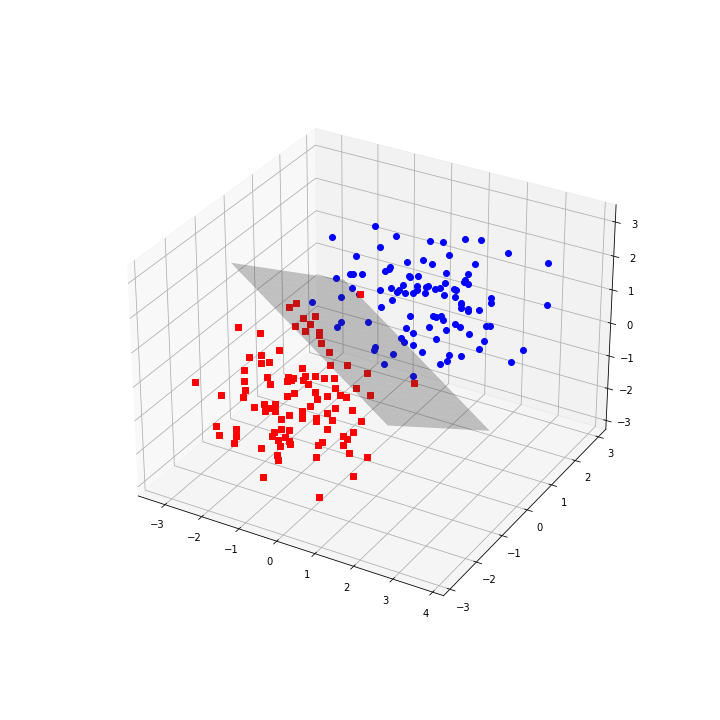

In [56]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

rs = np.random.RandomState(1234)

# Generate some fake data.
n_samples = 200
# X is the input features by row.
X = np.zeros((200, 3))
X[:int(n_samples/2)] = rs.multivariate_normal( np.ones(3), np.eye(3), size=int(n_samples/2))
X[int(n_samples/2):] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=int(n_samples/2))
# Y is the class labels for each row of X.
Y = np.zeros(n_samples); Y[int(n_samples/2):] = 1

# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y)

z = lambda x, y: (-svc.intercept_[0] - svc.coef_[0][0] * x - svc.coef_[0][1] * y) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y), alpha=.3, color='grey')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()

In [59]:
# domyślnie: kernel='rbf' (nieliniowy!)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.92

In [60]:
# regularyzacja (C = 1 / lambda)

model = SVC(kernel='linear', C=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9209090909090909

### Kernel trick

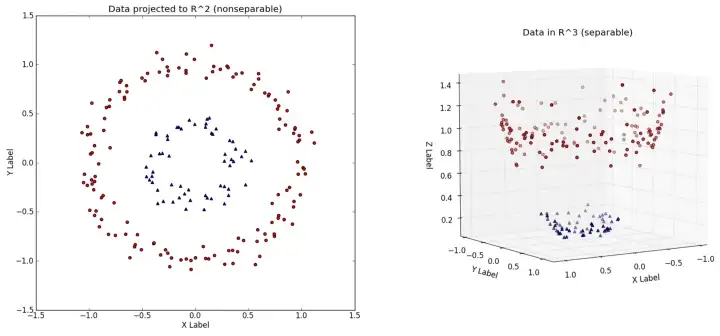

Źródło: https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78

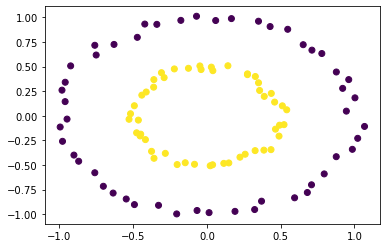

In [69]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, shuffle=True, noise=0.03, random_state=None, factor=0.5)

plt.scatter(X[:, 0], X[:, 1], c=y);

In [70]:
# zastosowanie LINIOWEGO jądra

model = SVC(kernel='linear')
model.fit(X, y)
y_pred = model.predict(X)

accuracy_score(y_pred, y)

0.56

In [71]:
# zastosowanie NIELINIOWEGO jądra

model = SVC(kernel='rbf')
model.fit(X, y)
y_pred = model.predict(X)

accuracy_score(y_pred, y)

1.0

**ZALETY:**
- Potrafi poradzić sobie z nieliniowymi danymi (kernel trick)

**WADY:**
- Wymaga normalizacji / standaryzacji

**ZASTOSOWANIA:**
- Klasyfikacja obrazów
- Bioinformatyka
- Dane przestrzenne

**DODATKOWE MATERIAŁY:**
- https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200
- https://data-flair.training/blogs/applications-of-svm/
- https://www.youtube.com/watch?v=efR1C6CvhmE

> ZADANIA

## Klasyfikacja wieloklasowa

Najczęściej mamy do czynienia z klasyfikacją binarną. Niektóre problemy wiążą się jednak z możliwością wystąpienia wielu klas. Wówczas zachodzi jedna z dwóch możliwości:
- na wyjściu może znaleźć się jedna lub więcej z klas (albo żadna)
- wynikiem będzie zawsze dokładnie jedna z klas

W pierwszym przypadku można zamienić ten problem na $N$ klasyfikacji binarnych - dla każdej klasy wynikowej albo pojawi się ona na wyjściu albo nie pojawi się.

W drugim przypadku mamy do czynienia z klasyczną klasyfikacją wieloklasową. Nie wszystkie modele oraz metryki mogą ją obsłużyć. Z modeli jest to na przykład regresja logistyczna a z metryk *precision* czy *recall*. 

## KNN (*K Nearest Neighbours*)

Model KNN jest bardzo prosty i przyporządkowuje obserwację do jednej z wielu klas sprawdzając przedstawicielów jakiej klasy jest najwięcej w pobliżu tej obserwacji.

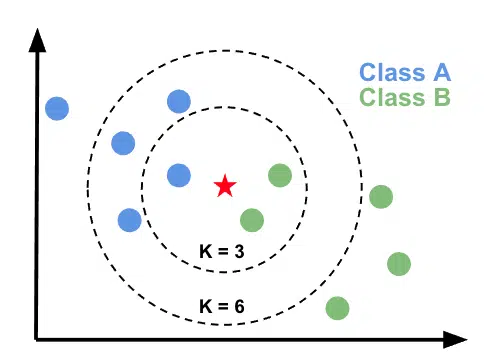

Źródło: https://www.jcchouinard.com/k-nearest-neighbors/

In [73]:
df = pd.read_csv("data/weight-height.csv")

df.insert(0, "IsMale", df["Gender"].map(lambda x: x == "Male").astype(int))
df.drop("Gender", axis=1, inplace=True)

X = df[["Height", "Weight"]]
y = df["IsMale"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)  # balans klas !

In [74]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8993939393939394

In [75]:
model = KNeighborsClassifier(n_neighbors=30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9203030303030303

In [76]:
model = KNeighborsClassifier(n_neighbors=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9187878787878788

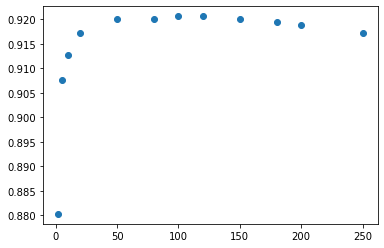

In [83]:
scores = []
k_list = [2, 5, 10, 20, 50, 80, 100, 120, 150, 180, 200, 250]

for k in k_list:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    
plt.scatter(k_list, scores);

In [79]:
# Przeskalowanie cech (źle dobrane, pogorszy wyniki)

X_train_ = X_train.copy()
X_train_["Height"] = X_train_["Height"] / 100
X_train_["Weight"] = X_train_["Weight"] * 1000

X_test_ = X_test.copy()
X_test_["Height"] = X_test_["Height"] / 100
X_test_["Weight"] = X_test_["Weight"] * 1000

In [80]:
model = KNeighborsClassifier(n_neighbors=30)
model.fit(X_train_, y_train)
y_pred = model.predict(X_test_)

accuracy_score(y_test, y_pred)

0.9106060606060606

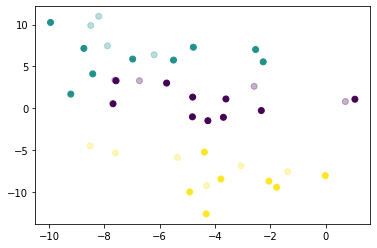

In [97]:
# inne dane (symulacja):

X, y = make_blobs(n_samples=40, cluster_std=2.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.3)

In [98]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8571428571428571

**ZALETY:**
- Łatwy w interpretacji wizualnej dla dwóch, maksymalnie trzech wymiarów


**WADY:**
- Wymagane jest podanie parametru $K$ a co za tym idzie znalezienie jego optymalnej wartości
- Ze względu na symetrię między wszystkimi kierunkami przestrzeni dane muszą być znormalizowane

**ZASTOSOWANIA:**
- Klasyfikacja na podstawie rozmiarów lub innych wymiarów przestrzennych

**DODATKOWE MATERIAŁY:**
- https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f
- https://medium.com/geekculture/k-nearest-neighbours-explained-761afc552918
- https://www.youtube.com/watch?v=HVXime0nQeI

> ZADANIA

## Metody typu *ensemble* dla drzew

Drzewa decyzyjne często używane są w grupach zwanych ensemblami. Polega to na trenowaniu nie pojedynczego drzewa ale wielu drzew, które uzupełniają się nawzajem. Takie podejście sprawdza się lepiej w przypadku złożonych problemów niż klasyczne algorytmy.

Istnieją różne rodzaje ensemblingu, ale najważniejsze dwa to: 
- bagging (**b**ootstrap **agg**regat**ing**)
- boosting (wzmacnianie)

---
Przykładem **baggingu** dla drzew decyzyjnych jest las losowy.

Przykładem **boostingu** dla drzew decyzyjnych (i nie tylko) jest gradient boosting

### Lasy losowe (*RandomForestClassifier*) - bagging

Las losowy to zestaw $N$ drzew decyzyjnych. Pojedyncze drzewo - albo inny model używany w baggingu - określane jest mianem **weak learner**. Jego losowość polega na tym, że
- każde drzewo ma inny zbiór obserwacji użytych do trenowania
- każdy węzeł decyzyjny dysponuje innymi, losowo wybranymi cechami

Dzięki temu model jest w stanie lepiej uogólnić zależności występujące w danych, redukowana jest zmienność (*variance*) modelu i w efekcie zmniejsza się szansa na wystąpienie overfittingu.

Każde z drzew jest trenowane niezależnie od innych. Kiedy używamy lasu do dokonania predykcji każde drzewo dokonuje predykcji samodzielnie a następnie poszczególne wyniki (prawdopodobieństwa dla poszczególnych klas) są uśredniane i na tej podstawie podejmowana jest decyzja.

Przykład:

Drzewo 1: `tree1.predict_proba(...) = [0.1, 0.9]`

Drzewo 2: `tree2.predict_proba(...) = [0.6, 0.4]`

Drzewo 3: `tree3.predict_proba(...) = [0.5, 0.5]`

Średnia: `rf.predict_proba(...) = [0.4, 0.6]`. Predykcja - klasa 1

---
**Bootstraping - losowanie obserwacji do trenowania poszczególnych drzew**

Bagging to skrót od *bootstrap aggregating*. Czym jest bootstrap? Jest to proces losowania ze zwracaniem obserwacji, które będą użyte do nauki poszczególnych drzew. Jego cechą jest to, że każda obserwacja może się powtórzyć a co za tym idzie nie każda obserwacja będzie użyta.

Gdybyśmy chcieli wykorzystać *bootstraping* na zbiorze pięciu liczb całkowitych - 1, 2, 3, 4, 5 - moglibyśmy uzyskać na przykład następujące wyniki:
- `2, 1, 2, 3, 4` albo
- `3, 1, 1, 2, 2` albo
- `3, 2, 1, 5, 4` albo
- `4, 4, 4, 4, 1` itd...

In [100]:
X = df[["Height", "Weight"]]
y = df["IsMale"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [118]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9081818181818182

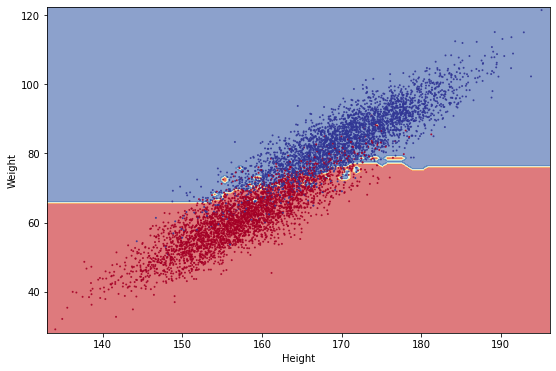

In [119]:
# cał model
plot_decision(model)

In [120]:
model = RandomForestClassifier(n_estimators=1000, max_depth=4, criterion='entropy', max_features='sqrt',
                               random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9175757575757576

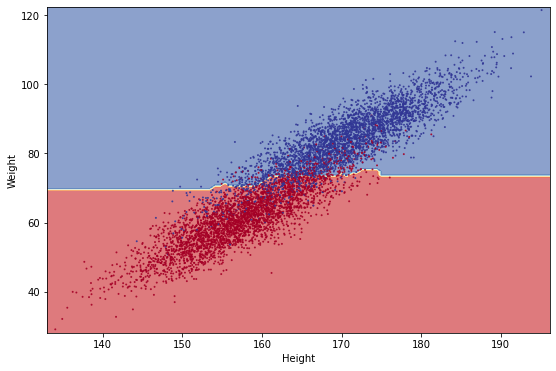

In [121]:
# cały model (z parametrami)
plot_decision(model)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       random_state=1478610112)


/home/mdabrowski-phd/.local/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


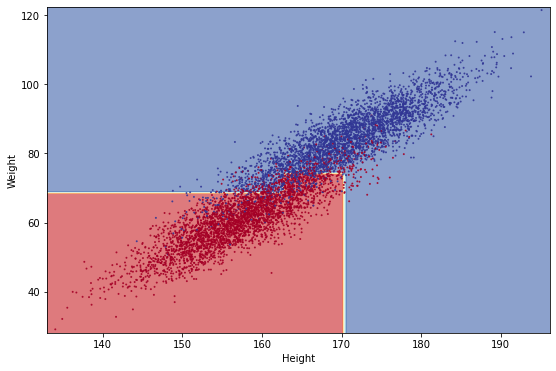

In [130]:
# pojedyncze drzewa
print(model.estimators_[3])
plot_decision(model.estimators_[3])  # 1, 2, 3, ...

### Gradient boosting

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, max_features='sqrt', max_depth=2,
                                  random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9206060606060606

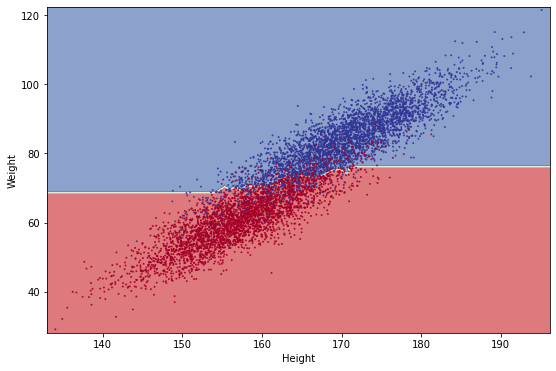

In [132]:
plot_decision(model)

**ZALETY:**
- Metody *ensemble* są bardziej odporne na przeuczenie (*bagging* obniża zmienność modelu) oraz na zbyt małe dopasowanie (*boosting* obniża bias modelu)
- Dają lepsze wyniki kiedy zależność między predyktorami a zmienną zależną jest złożona
- Dają pole do optymalizacji poprzez dostrajanie hiperparametrów

**WADY:**
- Bardziej kosztowne obliczeniowo niż pojedyncze drzewo
- Ich trenowanie jest bardziej złożone i czasochłonne jeśli chcemy zoptymalizować hiperparametry
- Tracona jest interpretowalność

**ZASTOSOWANIA:**
- Są używane na równi z sieciami neuronowymi do złożonych problemów jeśli dysponujemy odpowiednią mocą obliczeniową

**DODATKOWE MATERIAŁY:**
- https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

> ZADANIA